In [1]:
import os 
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from imblearn.over_sampling import SMOTE

from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import string

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ralph/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ralph/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ralph/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ralph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
directory = "/Users/ralph/Downloads/projectfiles/Dataset"
csv_files = ['r_anxietydepression.csv', 'r_casualconversation.csv', 'r_depression.csv', 'r_EOOD.csv', 'r_mentalhealth.csv', 'r_mentalillness.csv', 'r_offmychest.csv', 'r_suicidewatch.csv', 'r_therapy.csv']

#merging all the dataset into one 
combined_df = pd.concat([pd.read_csv(os.path.join(directory, file)) for file in csv_files], ignore_index=True)
(combined_df)

,author,title,score,id,num_of_comments,body,date_of_post,is_mod
0,Zealousideal_Lion_12,Join Our Official Discord Server for Anxiety a...,19,14apupz,8,"Hey r/AnxietyDepression,\n\nI'm excited to ann...",1.686899e+09,moderator
1,TinyTiger642,Help needed urgently please,1,1c5tgkw,1,TW: self-harm\nFor context I have diagnosed GA...,1.713307e+09,NaN
2,Ralenj6,Some Words of Hope,2,1c5n6h1,0,Some Words of Hope \n\nSpeaking as someone who...,1.713291e+09,NaN
3,Briefin69,Hear me...,3,1c5j70v,2,So here I go again: I can't stand the thought ...,1.713282e+09,NaN
4,FanSubstantial9845,best medication for generalised anxiety disorder,1,1c5r13f,1,"I have it long time, tried few meds didnt work...",1.713301e+09,NaN
...,...,...,...,...,...,...,...,...
8583,BornWhole,Confused bout relationships.,2,1bmwuko,1,I am confused if I should let myself be open t...,1.711318e+09,NaN
8584,HeroHoosier,Is it wrong,1,1bn13tz,4,Is it wrong if I want a therapist to just work...,1.711329e+09,NaN
8585,SizeExtension3785,How to deal with parents that won't accept bou...,1,1bn13cu,1,Hello\r \n\r \nMy wife recently decided it w...,1.711329e+09,NaN
8586,mdonetime,Didn't think it world be so difficult,3,1bmpvfk,23,How am I supposed to find a therapist???\n\nI ...,1.711300e+09,NaN


In [3]:
filtered_df = combined_df[~combined_df['is_mod'].str.contains('moderator', case=False, na=False) & 
                          (combined_df['author'] != 'AutoModerator')]

filtered_df

,author,title,score,id,num_of_comments,body,date_of_post,is_mod
1,TinyTiger642,Help needed urgently please,1,1c5tgkw,1,TW: self-harm\nFor context I have diagnosed GA...,1.713307e+09,NaN
2,Ralenj6,Some Words of Hope,2,1c5n6h1,0,Some Words of Hope \n\nSpeaking as someone who...,1.713291e+09,NaN
3,Briefin69,Hear me...,3,1c5j70v,2,So here I go again: I can't stand the thought ...,1.713282e+09,NaN
4,FanSubstantial9845,best medication for generalised anxiety disorder,1,1c5r13f,1,"I have it long time, tried few meds didnt work...",1.713301e+09,NaN
5,Global-Job-4831,I can not seem to overcome this,3,1c5gdwi,2,I can be a very pessimistic person..... becaus...,1.713275e+09,NaN
...,...,...,...,...,...,...,...,...
8583,BornWhole,Confused bout relationships.,2,1bmwuko,1,I am confused if I should let myself be open t...,1.711318e+09,NaN
8584,HeroHoosier,Is it wrong,1,1bn13tz,4,Is it wrong if I want a therapist to just work...,1.711329e+09,NaN
8585,SizeExtension3785,How to deal with parents that won't accept bou...,1,1bn13cu,1,Hello\r \n\r \nMy wife recently decided it w...,1.711329e+09,NaN
8586,mdonetime,Didn't think it world be so difficult,3,1bmpvfk,23,How am I supposed to find a therapist???\n\nI ...,1.711300e+09,NaN


In [4]:
# merging title and body columns to a new column called "text"
filtered_df['text'] = filtered_df['title'].fillna('') + ' ' + filtered_df['body'].fillna('')

# dropping 'is_mod', 'body', 'title' columns
filtered_df.drop(['is_mod', 'body', 'title'], axis=1, inplace=True)

filtered_df

/tmp/ipykernel_917/892728093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['text'] = filtered_df['title'].fillna('') + ' ' + filtered_df['body'].fillna('')
/tmp/ipykernel_917/892728093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['is_mod', 'body', 'title'], axis=1, inplace=True)


,author,score,id,num_of_comments,date_of_post,text
1,TinyTiger642,1,1c5tgkw,1,1.713307e+09,Help needed urgently please TW: self-harm\nFor...
2,Ralenj6,2,1c5n6h1,0,1.713291e+09,Some Words of Hope Some Words of Hope \n\nSpea...
3,Briefin69,3,1c5j70v,2,1.713282e+09,Hear me... So here I go again: I can't stand ...
4,FanSubstantial9845,1,1c5r13f,1,1.713301e+09,best medication for generalised anxiety disord...
5,Global-Job-4831,3,1c5gdwi,2,1.713275e+09,I can not seem to overcome this I can be a ver...
...,...,...,...,...,...,...
8583,BornWhole,2,1bmwuko,1,1.711318e+09,Confused bout relationships. I am confused if ...
8584,HeroHoosier,1,1bn13tz,4,1.711329e+09,Is it wrong Is it wrong if I want a therapist ...
8585,SizeExtension3785,1,1bn13cu,1,1.711329e+09,How to deal with parents that won't accept bou...
8586,mdonetime,3,1bmpvfk,23,1.711300e+09,Didn't think it world be so difficult How am I...


In [5]:
sentiment_analyzer = SentimentIntensityAnalyzer()

filtered_df['sentiment_score'] = filtered_df['text'].apply(lambda text: sentiment_analyzer.polarity_scores(text)['compound'])

# Classify as depressive (1) or non-depressive (0)
filtered_df['is_depressive'] = filtered_df['sentiment_score'].apply(lambda score: 1 if score < 0 else 0)

# Show the DataFrame with the new columns
filtered_df


/tmp/ipykernel_917/3394177443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment_score'] = filtered_df['text'].apply(lambda text: sentiment_analyzer.polarity_scores(text)['compound'])
/tmp/ipykernel_917/3394177443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['is_depressive'] = filtered_df['sentiment_score'].apply(lambda score: 1 if score < 0 else 0)


,author,score,id,num_of_comments,date_of_post,text,sentiment_score,is_depressive
1,TinyTiger642,1,1c5tgkw,1,1.713307e+09,Help needed urgently please TW: self-harm\nFor...,-0.9256,1
2,Ralenj6,2,1c5n6h1,0,1.713291e+09,Some Words of Hope Some Words of Hope \n\nSpea...,0.9930,0
3,Briefin69,3,1c5j70v,2,1.713282e+09,Hear me... So here I go again: I can't stand ...,-0.9739,1
4,FanSubstantial9845,1,1c5r13f,1,1.713301e+09,best medication for generalised anxiety disord...,-0.1655,1
5,Global-Job-4831,3,1c5gdwi,2,1.713275e+09,I can not seem to overcome this I can be a ver...,-0.9211,1
...,...,...,...,...,...,...,...,...
8583,BornWhole,2,1bmwuko,1,1.711318e+09,Confused bout relationships. I am confused if ...,0.9555,0
8584,HeroHoosier,1,1bn13tz,4,1.711329e+09,Is it wrong Is it wrong if I want a therapist ...,0.4678,0
8585,SizeExtension3785,1,1bn13cu,1,1.711329e+09,How to deal with parents that won't accept bou...,-0.9793,1
8586,mdonetime,3,1bmpvfk,23,1.711300e+09,Didn't think it world be so difficult How am I...,0.7786,0


In [6]:
counts = filtered_df['is_depressive'].value_counts()

# Display the counts
print("Count of 1 (depressive):", counts.get(1, 0))
print("Count of 0 (non-depressive):", counts.get(0, 0))

Count of 1 (depressive): 4544
Count of 0 (non-depressive): 3673


In [7]:
filtered_df.dtypes

author              object
score                int64
id                  object
num_of_comments      int64
date_of_post       float64
text                object
sentiment_score    float64
is_depressive        int64
dtype: object

In [8]:
# Checking for missing values
filtered_df.isna().sum()

author             114
score                0
id                   0
num_of_comments      0
date_of_post         0
text                 0
sentiment_score      0
is_depressive        0
dtype: int64

In [9]:
# Drop rows with missing values
filtered_df.dropna(inplace=True)

filtered_df

/tmp/ipykernel_917/1842303236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace=True)


,author,score,id,num_of_comments,date_of_post,text,sentiment_score,is_depressive
1,TinyTiger642,1,1c5tgkw,1,1.713307e+09,Help needed urgently please TW: self-harm\nFor...,-0.9256,1
2,Ralenj6,2,1c5n6h1,0,1.713291e+09,Some Words of Hope Some Words of Hope \n\nSpea...,0.9930,0
3,Briefin69,3,1c5j70v,2,1.713282e+09,Hear me... So here I go again: I can't stand ...,-0.9739,1
4,FanSubstantial9845,1,1c5r13f,1,1.713301e+09,best medication for generalised anxiety disord...,-0.1655,1
5,Global-Job-4831,3,1c5gdwi,2,1.713275e+09,I can not seem to overcome this I can be a ver...,-0.9211,1
...,...,...,...,...,...,...,...,...
8583,BornWhole,2,1bmwuko,1,1.711318e+09,Confused bout relationships. I am confused if ...,0.9555,0
8584,HeroHoosier,1,1bn13tz,4,1.711329e+09,Is it wrong Is it wrong if I want a therapist ...,0.4678,0
8585,SizeExtension3785,1,1bn13cu,1,1.711329e+09,How to deal with parents that won't accept bou...,-0.9793,1
8586,mdonetime,3,1bmpvfk,23,1.711300e+09,Didn't think it world be so difficult How am I...,0.7786,0


In [10]:
output_file = "output_data.csv"
filtered_df.to_csv(output_file, index=False)

print(f"DataFrame has been exported to '{output_file}'.")

DataFrame has been exported to 'output_data.csv'.


In [11]:
#represents the length of the text body of each entry in your DataFrame
filtered_df['text_len'] = filtered_df['text'].apply(len)
filtered_df.head(5)

/tmp/ipykernel_917/319366496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['text_len'] = filtered_df['text'].apply(len)


,author,score,id,num_of_comments,date_of_post,text,sentiment_score,is_depressive,text_len
1,TinyTiger642,1,1c5tgkw,1,1.713307e+09,Help needed urgently please TW: self-harm\nFor...,-0.9256,1,499
2,Ralenj6,2,1c5n6h1,0,1.713291e+09,Some Words of Hope Some Words of Hope \n\nSpea...,0.9930,0,2792
3,Briefin69,3,1c5j70v,2,1.713282e+09,Hear me... So here I go again: I can't stand ...,-0.9739,1,1390
4,FanSubstantial9845,1,1c5r13f,1,1.713301e+09,best medication for generalised anxiety disord...,-0.1655,1,234
5,Global-Job-4831,3,1c5gdwi,2,1.713275e+09,I can not seem to overcome this I can be a ver...,-0.9211,1,1489


In [12]:
filtered_df.describe()

,score,num_of_comments,date_of_post,sentiment_score,is_depressive,text_len
count,8103.000000,8103.000000,8.103000e+03,8103.000000,8103.000000,8103.000000
mean,14.498704,6.943107,1.710675e+09,-0.123009,0.552511,1099.619400
std,167.518397,38.247932,6.337795e+06,0.798593,0.497266,1240.559907
min,0.000000,0.000000,1.563779e+09,-0.999700,0.000000,4.000000
25%,1.000000,0.000000,1.711563e+09,-0.930300,0.000000,377.000000
50%,2.000000,1.000000,1.713113e+09,-0.382600,1.000000,749.000000
75%,5.000000,5.000000,1.713261e+09,0.791450,1.000000,1372.500000
max,10859.000000,1455.000000,1.713379e+09,0.999900,1.000000,23685.000000


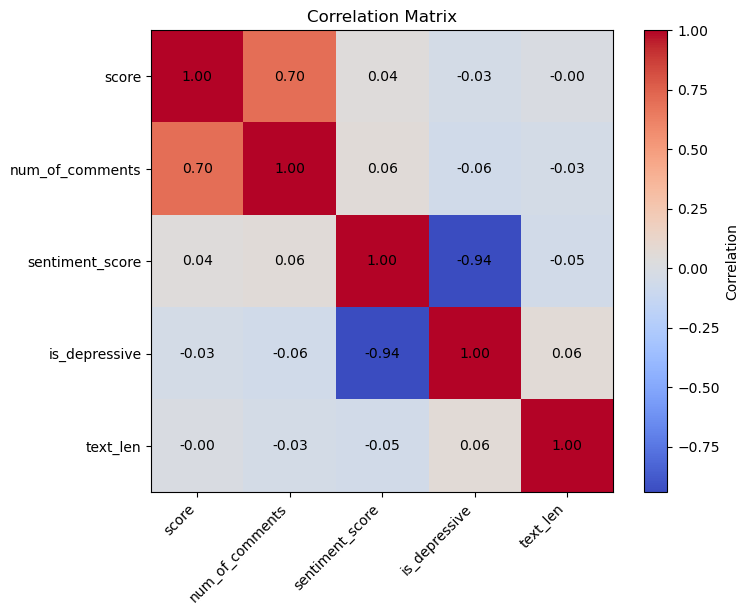

In [13]:
#correlation matrix
columns_to_correlate = ['score', 'num_of_comments', 'sentiment_score', 'is_depressive', 'text_len']

correlation_matrix = filtered_df[columns_to_correlate].corr()

# Create a figure and axis for the plot
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Get the number of rows and columns in the correlation matrix
num_rows, num_cols = correlation_matrix.shape

# Display correlation values as text within each cell
for i in range(num_rows):
    for j in range(num_cols):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", 
                 ha='center', va='center', color='black', fontsize=10)

# Set axis labels and title
plt.xticks(np.arange(num_cols), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(num_rows), correlation_matrix.index)
plt.title("Correlation Matrix")

# Add colorbar to indicate correlation values
plt.colorbar(label='Correlation')

# Show plot
plt.show()

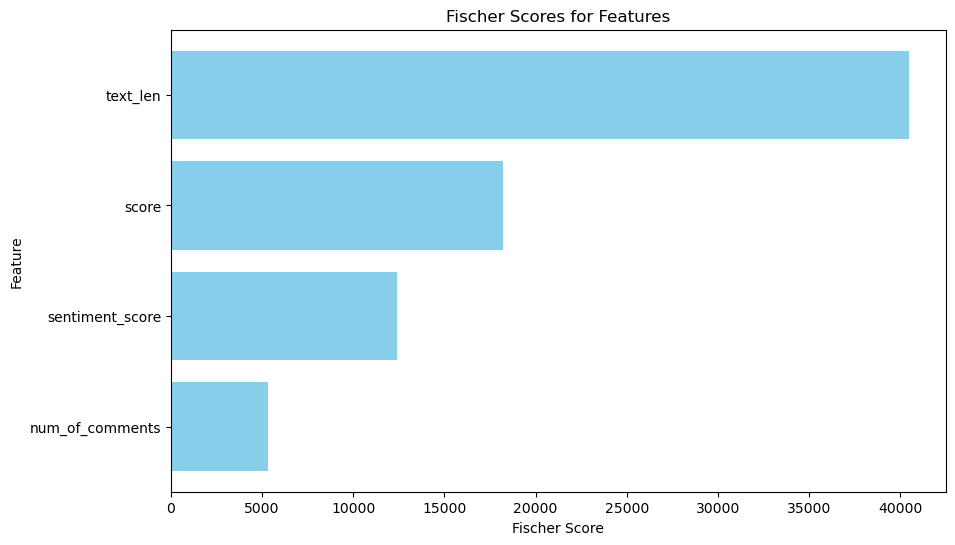

In [14]:
# Select features and target variable
X = filtered_df[['score', 'num_of_comments', 'sentiment_score', 'text_len']].abs()
y = filtered_df['is_depressive']

# Apply transformation to sentiment scores
shift_value = filtered_df['sentiment_score'].min()
transformed_sentiment_scores = np.exp(filtered_df['sentiment_score'] - shift_value)

# Update X with transformed sentiment scores
X['sentiment_score'] = transformed_sentiment_scores

# Calculate Fischer scores
fischer_scores, _ = chi2(X, y)

# Plot Fischer scores
sorted_indices = np.argsort(fischer_scores)[::-1]
sorted_scores = fischer_scores[sorted_indices]
sorted_features = X.columns[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_scores, color='skyblue')
plt.xlabel('Fischer Score')
plt.ylabel('Feature')
plt.title('Fischer Scores for Features')
plt.gca().invert_yaxis()
plt.show()

In [15]:
file_path = "/Users/ralph/Downloads/projectfiles/Dataset/depression_dataset_reddit_cleaned.csv"
new_df = pd.read_csv(file_path)
new_df

,text,is_depressive
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [16]:
# Selecting the necessary columns from the scraped data
filtered_df_subset = filtered_df[['text', 'is_depressive']]
filtered_df_subset

,text,is_depressive
1,Help needed urgently please TW: self-harm\nFor...,1
2,Some Words of Hope Some Words of Hope \n\nSpea...,0
3,Hear me... So here I go again: I can't stand ...,1
4,best medication for generalised anxiety disord...,1
5,I can not seem to overcome this I can be a ver...,1
...,...,...
8583,Confused bout relationships. I am confused if ...,0
8584,Is it wrong Is it wrong if I want a therapist ...,0
8585,How to deal with parents that won't accept bou...,1
8586,Didn't think it world be so difficult How am I...,0


In [17]:
# Combining the cleaned scrapped data and kaggle dataset
df = pd.concat([filtered_df_subset, new_df[['text', 'is_depressive']]], ignore_index=True)
df

,text,is_depressive
0,Help needed urgently please TW: self-harm\nFor...,1
1,Some Words of Hope Some Words of Hope \n\nSpea...,0
2,Hear me... So here I go again: I can't stand ...,1
3,best medication for generalised anxiety disord...,1
4,I can not seem to overcome this I can be a ver...,1
...,...,...
15829,is that snow,0
15830,moulin rouge mad me cry once again,0
15831,trying to shout but can t find people on the list,0
15832,ughh can t find my red sox hat got ta wear thi...,0


In [18]:
df.dtypes

text             object
is_depressive     int64
dtype: object

In [19]:
sentiment_analyzer = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['text'].apply(lambda text: sentiment_analyzer.polarity_scores(text)['compound'])

df['text_length'] = df['text'].apply(lambda text: len(text))

df['Emotions'] = df['sentiment_score'].apply(lambda score: 'negative' if score < 0 else 'positive')

df

,text,is_depressive,sentiment_score,text_length,Emotions
0,Help needed urgently please TW: self-harm\nFor...,1,-0.9256,499,negative
1,Some Words of Hope Some Words of Hope \n\nSpea...,0,0.9930,2792,positive
2,Hear me... So here I go again: I can't stand ...,1,-0.9739,1390,negative
3,best medication for generalised anxiety disord...,1,-0.1655,234,negative
4,I can not seem to overcome this I can be a ver...,1,-0.9211,1489,negative
...,...,...,...,...,...
15829,is that snow,0,0.0000,12,positive
15830,moulin rouge mad me cry once again,0,-0.7430,34,negative
15831,trying to shout but can t find people on the list,0,0.0000,49,positive
15832,ughh can t find my red sox hat got ta wear thi...,0,0.0000,73,positive


In [20]:
stats = df.groupby(['is_depressive', 'Emotions']).agg({'sentiment_score': ['mean', 'median', 'min', 'max'], 'text_length': ['mean', 'median', 'min', 'max']})
stats

sentiment_score                         text_length  \
                                  mean  median     min     max        mean   
is_depressive Emotions                                                       
0             negative       -0.441723 -0.4404 -0.9488 -0.0041   70.724515   
              positive        0.541121  0.5994  0.0000  0.9999  653.965805   
1             negative       -0.776222 -0.8835 -0.9997 -0.0009  967.113861   
              positive        0.608833  0.7050  0.0000  0.9996  731.831987   

                                          
                       median min    max  
is_depressive Emotions                    
0             negative   67.0   7    144  
              positive  260.0   4  14493  
1             negative  648.5  11  23685  
              positive  432.5   3   7942

/tmp/ipykernel_917/968472382.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Emotions', palette='muted', shrink=0.8)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


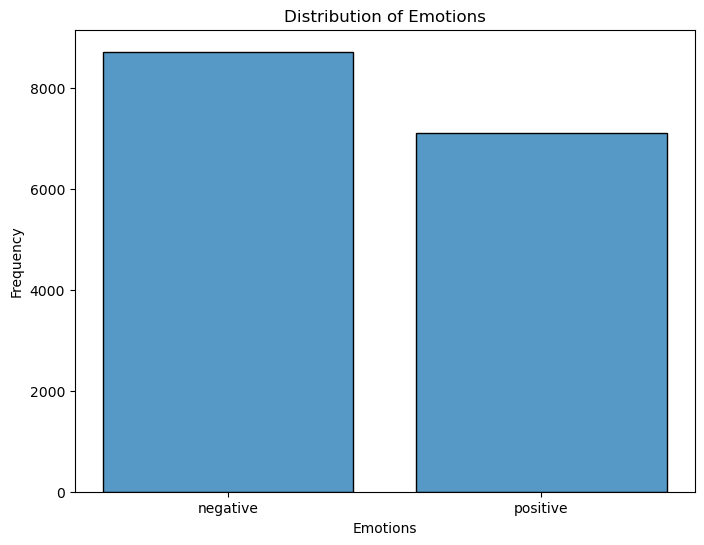

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Emotions', palette='muted', shrink=0.8)
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.show()

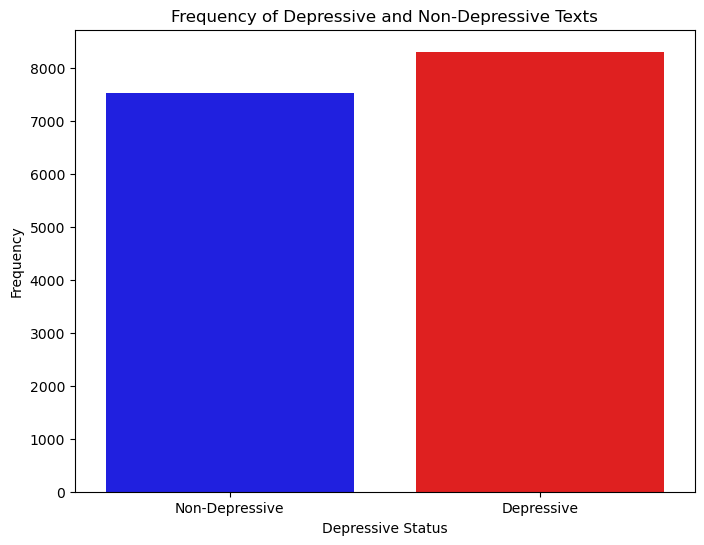

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_depressive', palette={0: 'blue', 1: 'red'})
plt.title('Frequency of Depressive and Non-Depressive Texts')
plt.xlabel('Depressive Status')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Non-Depressive', 'Depressive'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


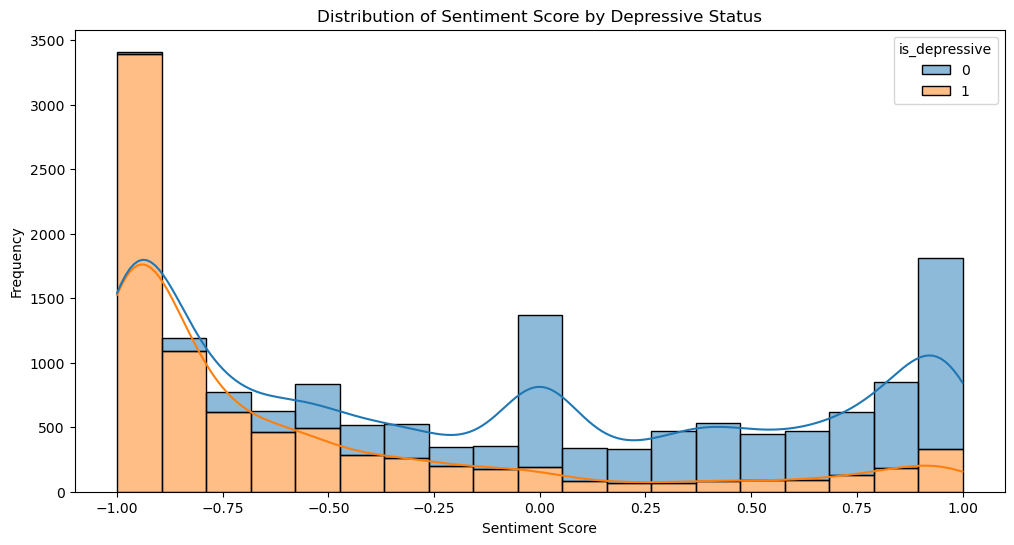

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='sentiment_score', hue='is_depressive', multiple='stack', kde=True)
plt.title('Distribution of Sentiment Score by Depressive Status')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


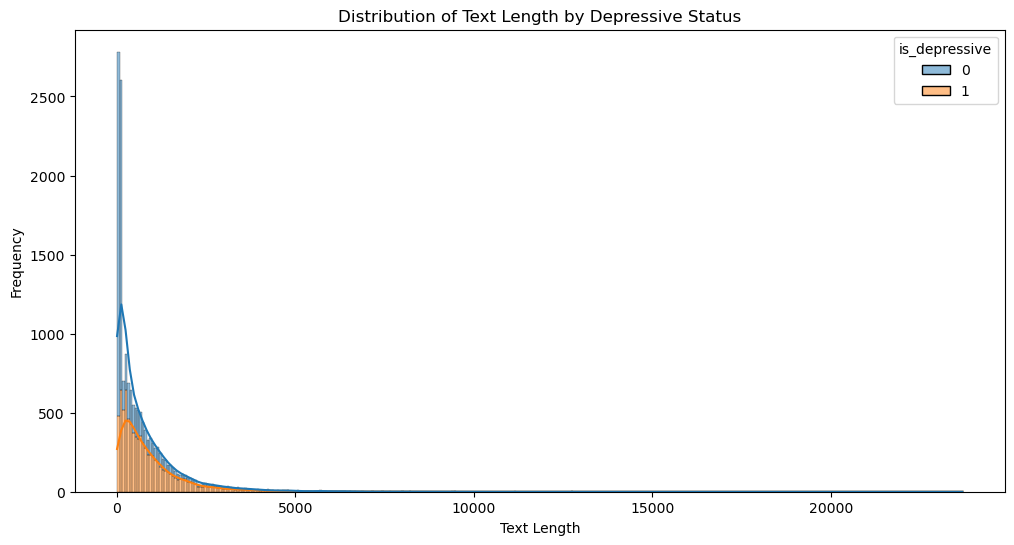

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='is_depressive', multiple='stack', kde=True)
plt.title('Distribution of Text Length by Depressive Status')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

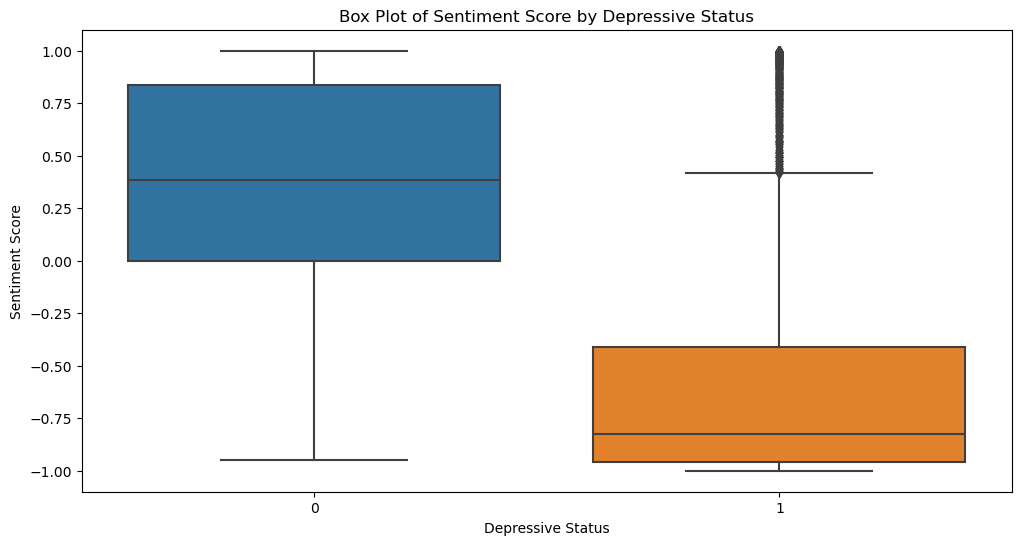

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='is_depressive', y='sentiment_score')
plt.title('Box Plot of Sentiment Score by Depressive Status')
plt.xlabel('Depressive Status')
plt.ylabel('Sentiment Score')
plt.show()

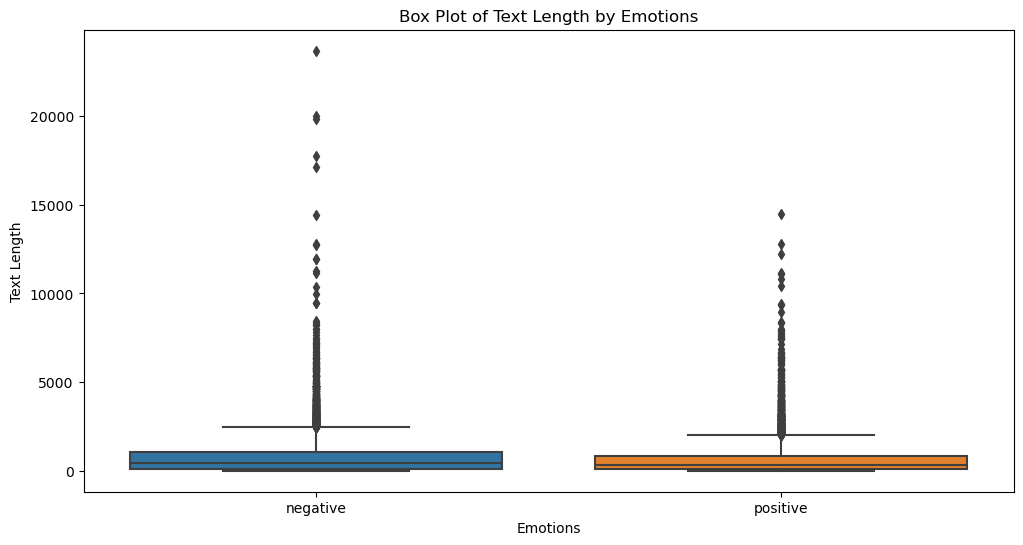

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Emotions', y='text_length')
plt.title('Box Plot of Text Length by Emotions')
plt.xlabel('Emotions')
plt.ylabel('Text Length')
plt.show()


                 sentiment_score  is_depressive
sentiment_score         1.000000      -0.634503
is_depressive          -0.634503       1.000000


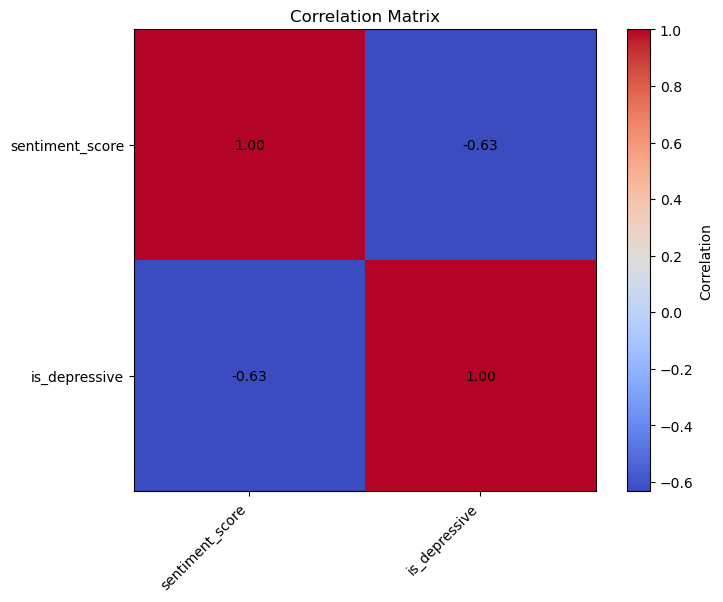

In [27]:
correlation_matrix = df[['sentiment_score', 'is_depressive']].corr()
print(correlation_matrix)

# Create a figure and axis for the plot
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Get the number of rows and columns in the correlation matrix
num_rows, num_cols = correlation_matrix.shape

# Display correlation values as text within each cell
for i in range(num_rows):
    for j in range(num_cols):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", 
                 ha='center', va='center', color='black', fontsize=10)

# Set axis labels and title
plt.xticks(np.arange(num_cols), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(num_rows), correlation_matrix.index)
plt.title("Correlation Matrix")

# Add colorbar to indicate correlation values
plt.colorbar(label='Correlation')

# Show plot
plt.show()

In [28]:
# Define a set of stopwords and punctuation marks
stop_words = set(stopwords.words('english')+ ['like', 'wa', 'want','dont','im','thing','know','didnt','gon','na',
                                              'ive','wan','cant','wanna','etc','shes','thats','hes','ha','Ie','u','`'])
punctuation = set(string.punctuation)

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F700-\U0001F77F" 
        u"\U0001F780-\U0001F7FF" 
        u"\U0001F800-\U0001F8FF" 
        u"\U0001F900-\U0001F9FF" 
        u"\U0001FA00-\U0001FA6F" 
        u"\U0001FA70-\U0001FAFF" 
        u"\U00002702-\U000027B0" 
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub('', text)
    
    # Remove other special characters, links, and emails
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\'", "", text)
    text = re.sub(r'[~!@£$%^&*()_+\-={}|\[\]\\:";\'<>,.?/’]', ' ', text)
    
    return text

In [29]:
def preprocess_text(text):
    # Clean text
    cleaned_text = clean_text(text)
    
    # Tokenize text
    tokens = word_tokenize(cleaned_text)
    
    # Remove stopwords and punctuation
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join lemmatized tokens back into text
    processed_text = ' '.join(lemmas)
    
    return processed_text


In [30]:
# Preprocess text in 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

# Transform text into numerical representation with increased features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(df['processed_text']).toarray()
vocabulary = tfidf_vectorizer.get_feature_names_out()

# Extract target variable
y = df['is_depressive']

In [31]:
X.shape

(15834, 5000)

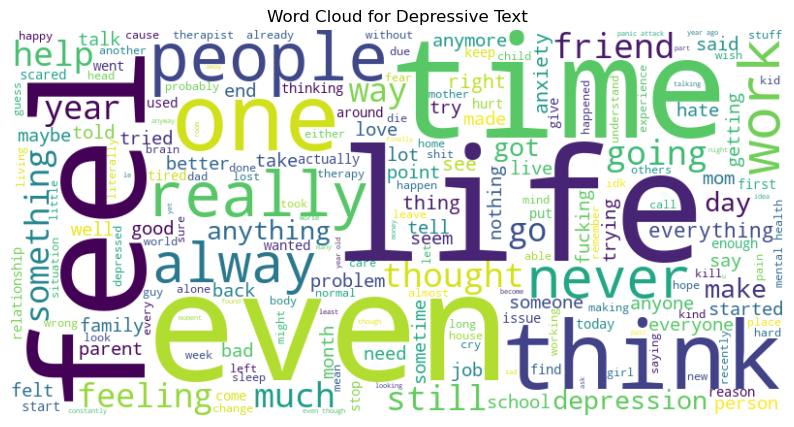

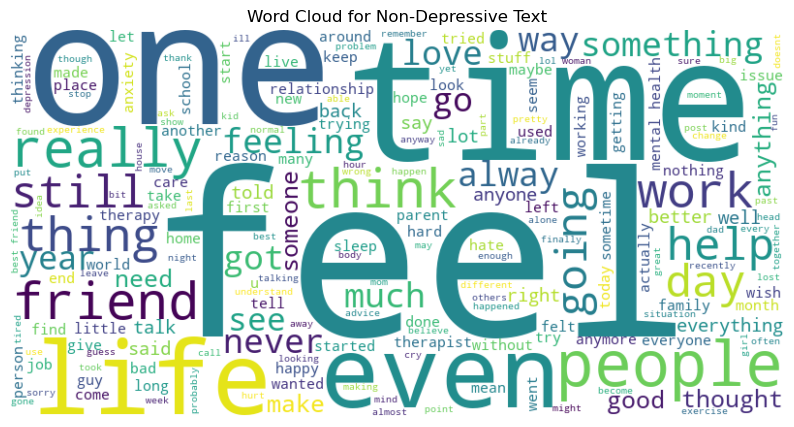

In [32]:
# Separate text data into depressive and non-depressive categories
depressive_text = df[df['is_depressive'] == 1]['processed_text']
non_depressive_text = df[df['is_depressive'] == 0]['processed_text']

#function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and display word cloud for depressive text
generate_word_cloud(depressive_text, title='Word Cloud for Depressive Text')

# Generate and display word cloud for non-depressive text
generate_word_cloud(non_depressive_text, title='Word Cloud for Non-Depressive Text')

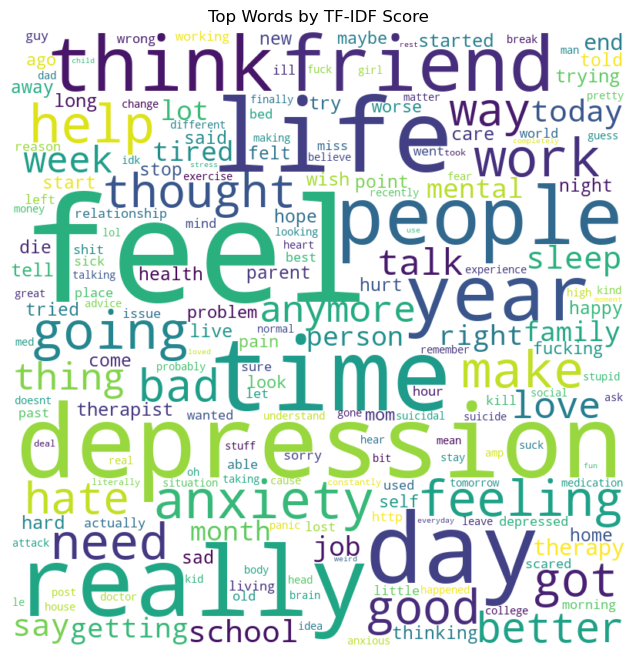

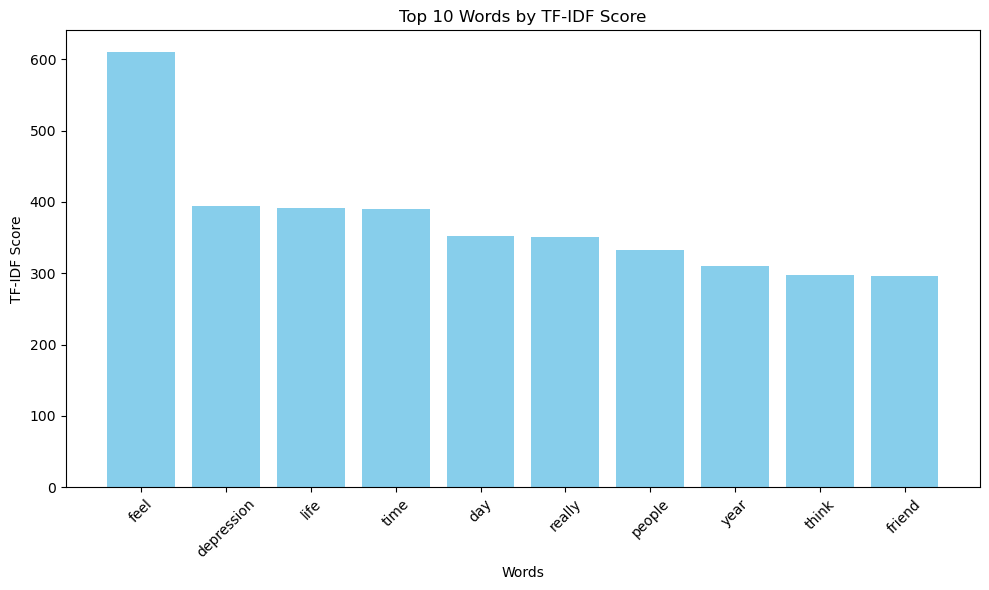

In [33]:
# Sum up TF-IDF scores for each word
word_scores = dict(zip(vocabulary, X.sum(axis=0)))

# Rank words based on their scores
top_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:200] 

wordcloud = WordCloud(width=800, height=800, background_color='white', prefer_horizontal=1.0, max_words=200, contour_width=3, contour_color='steelblue').generate_from_frequencies(dict(top_words))
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words by TF-IDF Score')
plt.show()

# Select only the top 10 words for the bar chart
top_words_bar = top_words[:10]
words_bar, scores_bar = zip(*top_words_bar)

# Create a frequency bar plot for the top 10 words
plt.figure(figsize=(10, 6))
plt.bar(words_bar, scores_bar, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.title('Top 10 Words by TF-IDF Score')
plt.tight_layout()
plt.show()

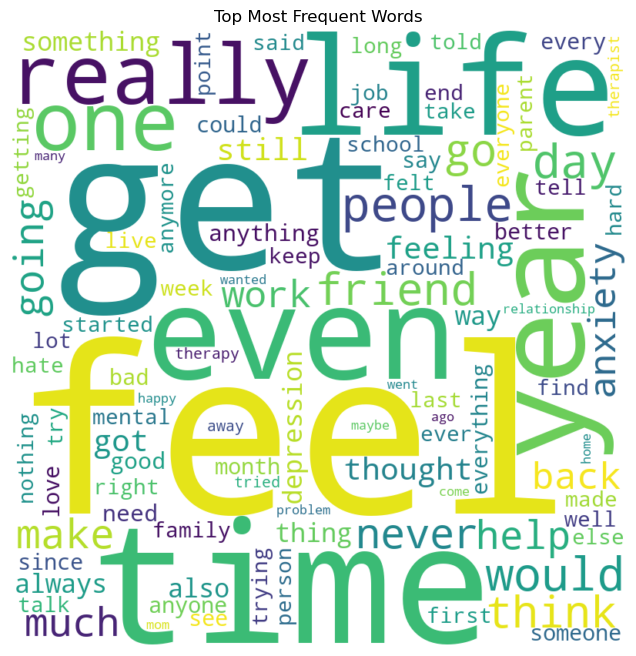

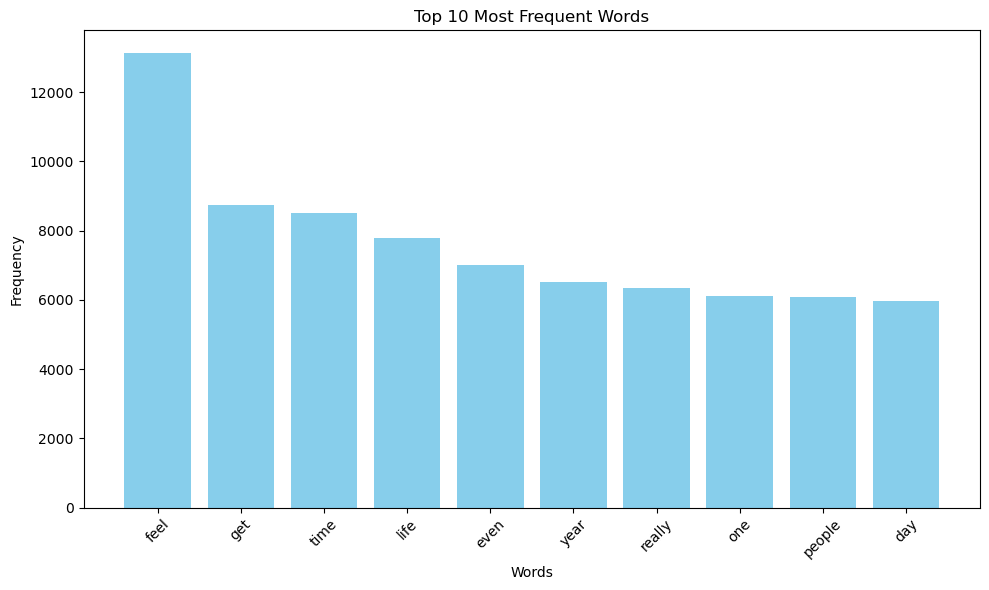

In [34]:
# Tokenize and preprocess text
tokens = [word for sent in df['processed_text'].apply(word_tokenize) for word in sent]

# Count word frequencies
word_freq = Counter(tokens)

# Select the top 100 most frequent words
top_words = word_freq.most_common(100)

# Convert the top words to a dictionary for word cloud generation
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words))
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Most Frequent Words')
plt.show()

# Select only the top 10 most frequent words for the bar chart
top_words = word_freq.most_common(10)
words, frequencies = zip(*top_words)

# Create a frequency bar plot for the top 10 most frequent words
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.tight_layout()
plt.show()


In [35]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (11083, 5000)
Shape of X_test: (4751, 5000)
Shape of y_train: (11083,)
Shape of y_test: (4751,)


In [36]:
class_counts = pd.Series(y_train).value_counts()
print("Class Counts:")
print(class_counts)

Class Counts:
is_depressive
1    5795
0    5288
Name: count, dtype: int64


In [37]:
# Calculate class percentages
class_percentages = class_counts / class_counts.sum() * 100
print("Class Percentages:")
print(class_percentages)

# Calculate class imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print("Class Imbalance Ratio:", imbalance_ratio)

# A perfectly balanced dataset class imbalance ratio will be 1 however thi is 1.09 which means its fairly balanced

Class Percentages:
is_depressive
1    52.287287
0    47.712713
Name: count, dtype: float64
Class Imbalance Ratio: 1.095877458396369



Model: Logistic Regression
Confusion matrix, without normalization
[[4309  979]
 [1019 4776]]


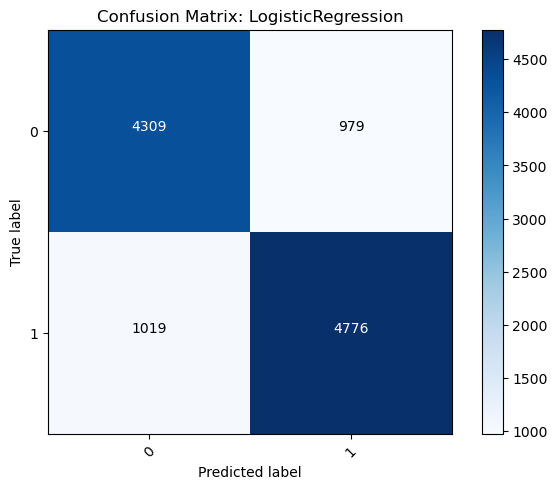

Accuracy: 0.8197239014707209

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      5288
           1       0.83      0.82      0.83      5795

    accuracy                           0.82     11083
   macro avg       0.82      0.82      0.82     11083
weighted avg       0.82      0.82      0.82     11083

Cross-Validated Accuracy: 0.8197239014707209
Model: Logistic Regression
Out of 11083 instances,
Correctly classified 4309 as Positive, 4776 as Negative.
Misclassified 979 as Positive, 1019 as Negative.

Model: Support Vector Machine
Confusion matrix, without normalization
[[4298  990]
 [ 926 4869]]


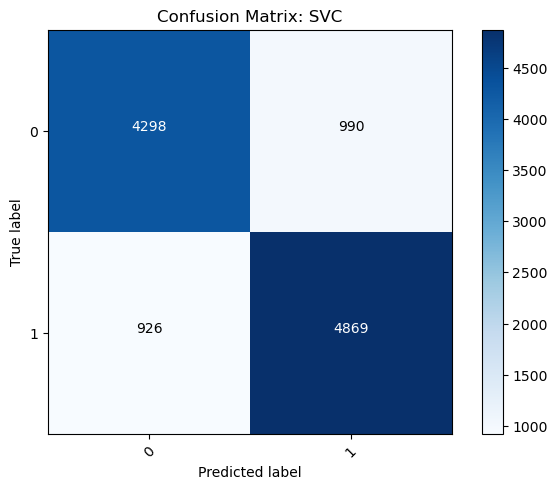

Accuracy: 0.8271226202291798

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      5288
           1       0.83      0.84      0.84      5795

    accuracy                           0.83     11083
   macro avg       0.83      0.83      0.83     11083
weighted avg       0.83      0.83      0.83     11083

Cross-Validated Accuracy: 0.8271226202291798
Model: Support Vector Machine
Out of 11083 instances,
Correctly classified 4298 as Positive, 4869 as Negative.
Misclassified 990 as Positive, 926 as Negative.

Model: Random Forest
Confusion matrix, without normalization
[[3662 1626]
 [ 552 5243]]


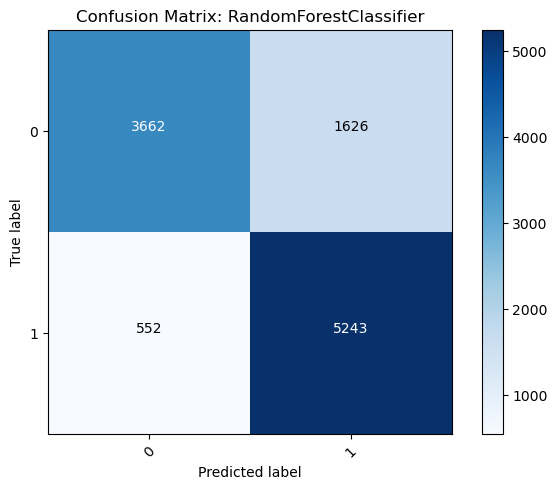

Accuracy: 0.8034828115131282

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      5288
           1       0.76      0.90      0.83      5795

    accuracy                           0.80     11083
   macro avg       0.82      0.80      0.80     11083
weighted avg       0.81      0.80      0.80     11083

Cross-Validated Accuracy: 0.8034828115131282
Model: Random Forest
Out of 11083 instances,
Correctly classified 3662 as Positive, 5243 as Negative.
Misclassified 1626 as Positive, 552 as Negative.

Model: Gradient Boosting Machine
Confusion matrix, without normalization
[[4281 1007]
 [1280 4515]]


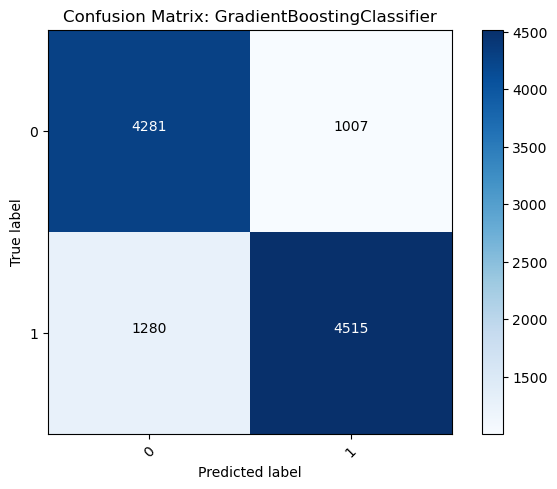

Accuracy: 0.7936479292610304

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      5288
           1       0.82      0.78      0.80      5795

    accuracy                           0.79     11083
   macro avg       0.79      0.79      0.79     11083
weighted avg       0.79      0.79      0.79     11083

Cross-Validated Accuracy: 0.7936479292610304
Model: Gradient Boosting Machine
Out of 11083 instances,
Correctly classified 4281 as Positive, 4515 as Negative.
Misclassified 1007 as Positive, 1280 as Negative.

Model: XGBoost
Confusion matrix, without normalization
[[4249 1039]
 [ 926 4869]]


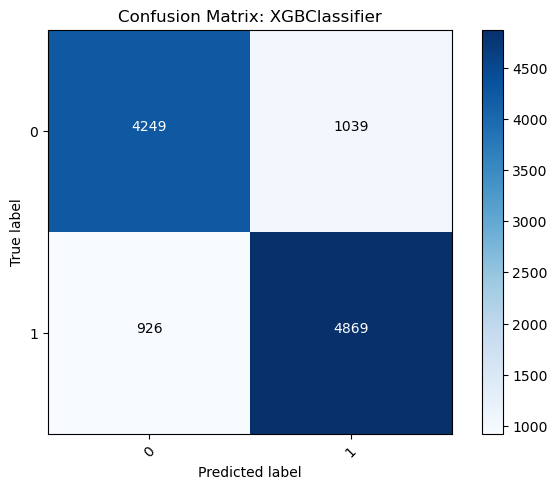

Accuracy: 0.8227014346296129

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      5288
           1       0.82      0.84      0.83      5795

    accuracy                           0.82     11083
   macro avg       0.82      0.82      0.82     11083
weighted avg       0.82      0.82      0.82     11083

Cross-Validated Accuracy: 0.8227014346296129
Model: XGBoost
Out of 11083 instances,
Correctly classified 4249 as Positive, 4869 as Negative.
Misclassified 1039 as Positive, 926 as Negative.


In [38]:
import itertools
def evaluate_model(model, X, y, cv=5):
    # Perform K-Fold Cross Validation
    cv_accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    # Fit the model
    model.fit(X, y)
    
    # Make predictions using K-Fold Cross Validation
    y_pred = cross_val_predict(model, X, y, cv=cv)
    
    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    
    # Generate classification report
    report = classification_report(y, y_pred)
    
    # Generate confusion matrix
    cm = confusion_matrix(y, y_pred)
    
    # Plot confusion matrix
    plot_confusion_matrix(model.__class__.__name__, cm, classes=np.unique(y),
                          title='Confusion Matrix', cmap=plt.cm.Blues)
    
    # Print accuracy and classification report
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(report)
    
    # Return confusion matrix and accuracy for summary
    return cm, accuracy

def print_summary(model_name, cm):
    TP, FP, FN, TN = list(cm.flatten())
    summary = f"Model: {model_name}\nOut of {sum(cm.flatten())} instances,\n"
    summary += f"Correctly classified {TP} as Positive, {TN} as Negative.\n"
    summary += f"Misclassified {FP} as Positive, {FN} as Negative."
    print(summary)

def plot_confusion_matrix(model_name, cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title+': '+model_name)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting Machine', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier())
]

# Iterate through each model
for name, model in models:
    print("\nModel:", name)
    
    # Evaluate model and get confusion matrix
    cm, accuracy = evaluate_model(model, X_train, y_train)
    print("Cross-Validated Accuracy:", accuracy)
    
    # Print summary using the confusion matrix
    print_summary(name, cm)


In [39]:
#Define base models
base_models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC()),
    ('XGBoost', XGBClassifier()),
]

# Define meta classifier
meta_classifier = LogisticRegression()

# Create StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_classifier,
    cv=5
)

# Fit the StackingClassifier
stacking_model.fit(X_train, y_train)

# Evaluate the StackingClassifier
cv_accuracy = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validated Accuracy:", cv_accuracy.mean())

Cross-Validated Accuracy: 0.8319943609359252



Model: Logistic Regression
Confusion matrix, without normalization
[[1800  438]
 [ 475 2038]]


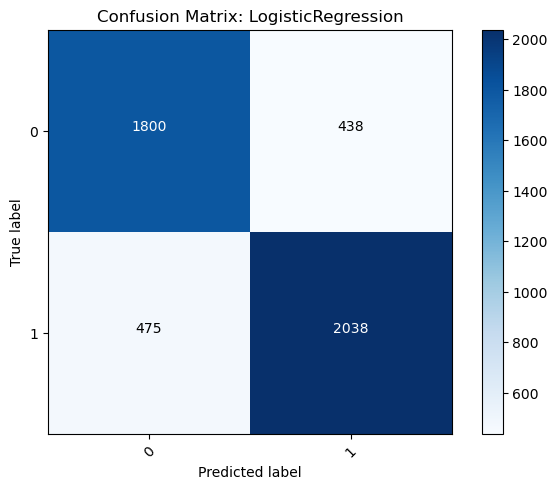


Test Data Accuracy: 0.8078299305409388

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2238
           1       0.82      0.81      0.82      2513

    accuracy                           0.81      4751
   macro avg       0.81      0.81      0.81      4751
weighted avg       0.81      0.81      0.81      4751


Model: Support Vector Machine
Confusion matrix, without normalization
[[1792  446]
 [ 436 2077]]


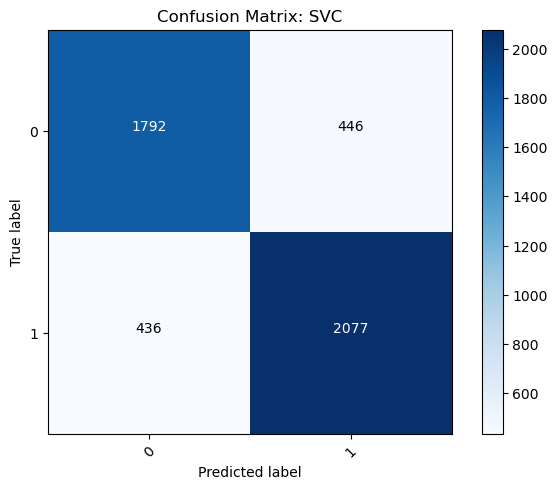


Test Data Accuracy: 0.8143548726583877

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2238
           1       0.82      0.83      0.82      2513

    accuracy                           0.81      4751
   macro avg       0.81      0.81      0.81      4751
weighted avg       0.81      0.81      0.81      4751


Model: Random Forest
Confusion matrix, without normalization
[[1511  727]
 [ 277 2236]]


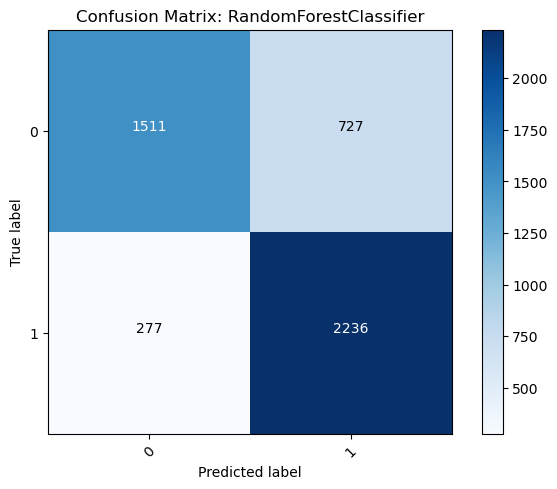


Test Data Accuracy: 0.7886760681961692

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75      2238
           1       0.75      0.89      0.82      2513

    accuracy                           0.79      4751
   macro avg       0.80      0.78      0.78      4751
weighted avg       0.80      0.79      0.79      4751


Model: Gradient Boosting Machine
Confusion matrix, without normalization
[[1799  439]
 [ 616 1897]]


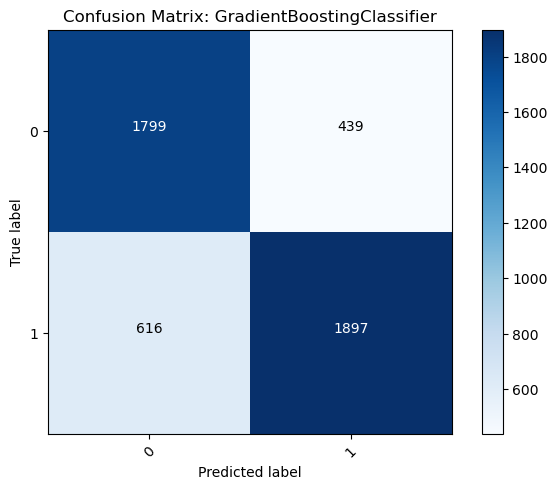


Test Data Accuracy: 0.7779414860029468

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2238
           1       0.81      0.75      0.78      2513

    accuracy                           0.78      4751
   macro avg       0.78      0.78      0.78      4751
weighted avg       0.78      0.78      0.78      4751


Model: XGBoost
Confusion matrix, without normalization
[[1777  461]
 [ 447 2066]]


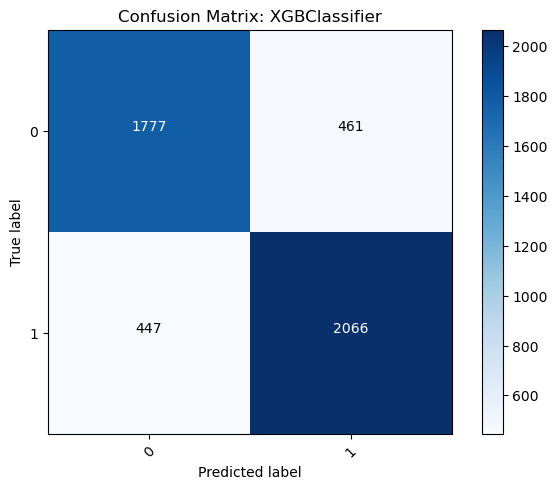


Test Data Accuracy: 0.8088823405598822

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2238
           1       0.82      0.82      0.82      2513

    accuracy                           0.81      4751
   macro avg       0.81      0.81      0.81      4751
weighted avg       0.81      0.81      0.81      4751



In [41]:

# Define a function to evaluate model performance on test data
def evaluate_model_test(model, X_test, y_test):
    # Make predictions on test data
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy for test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Generate classification report for test data
    test_report = classification_report(y_test, y_test_pred)
    
    # Generate confusion matrix for test data
    test_cm = confusion_matrix(y_test, y_test_pred)
    
    # Plot confusion matrix for test data
    plot_confusion_matrix(model.__class__.__name__, test_cm, classes=np.unique(y_test),
                          title='Confusion Matrix', cmap=plt.cm.Blues)
    
    # Print accuracy and classification report for test data
    print("\nTest Data Accuracy:", test_accuracy)
    print("\nTest Data Classification Report:")
    print(test_report)
    
    # Return confusion matrix and accuracy for summary
    return test_cm, test_accuracy

def plot_confusion_matrix(model_name, cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title + ': ' + model_name)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting Machine', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier())
]

# Iterate through each model
for name, model in models:
    print("\nModel:", name)
    
    # Fit the model on the training data (if not already done)
    model.fit(X_train, y_train)
    
    # Evaluate model performance on test data
    cm, test_accuracy = evaluate_model_test(model, X_test, y_test)
